In [1]:
import constants
cache_folder_name = 'ratio=logreg;loss=squared;method=pymanopt_UB_fast_no_ws;debug'
seed = 44

In [2]:
import autograd.numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

[Errno 17] File exists: '/mnt/nfs6/fultonw/projects/runs/domain_adapt_run/domain_adapt_run/notebooks/new/hyperparameter_loss_surface_stratified/CA_housing/cache/ratio=logreg;loss=squared;method=pymanopt_UB_fast_no_ws;debug'


In [3]:
import matplotlib.pyplot as plt
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
#import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.hyperparameter_loss_surface_stratified.run as run
import data.domain_adapt_data.domain_adapt_data.fxns as data

In [4]:
# define data
training_proportion = 0.9
training_sampler = functools.partial(data.kmm_paper_pca_subsample, 10., 5., 0.1)
get_data_f = data.CA_housing
num_data = 900

In [5]:
#
get_data = functools.partial(data.get_data_helper, training_proportion, training_sampler, get_data_f, num_data)

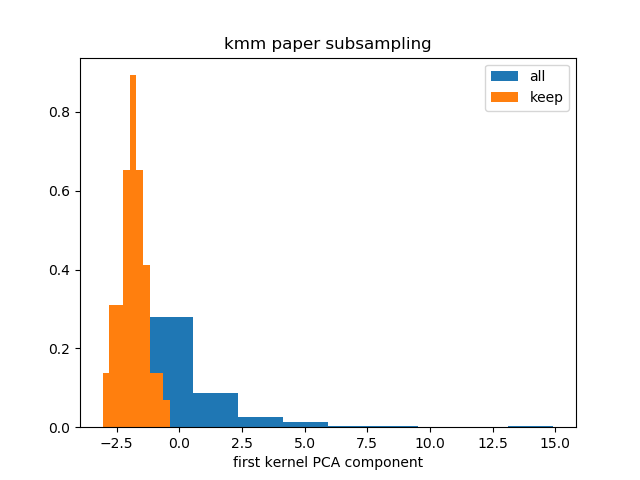

xs_train shape: (108, 9) xs_test_shape (108,)


In [6]:
# test get_data
xs_train, ys_train, xs_test, ys_test = get_data(1)
print 'xs_train shape:', xs_train.shape, 'xs_test_shape', xs_test.shape

In [7]:
# define fitter
import pymanopt.solvers
pymanopt_options={'logverbosity':2, 'maxiter':2}#, 'linesearch':pymanopt.solvers.linesearch.LineSearchBackTracking(maxiter=2, initial_stepsize=1)}
cvx_opt_warm_start = True
cvx_opt_scipy_minimize_options = {'maxiter':1000, 'disp':False}
#cvx_opt_scipy_minimize_method = 'cg'
#cvx_opt_scipy_minimize_method = 'BFGS' 
cvx_opt_scipy_minimize_method = 'L-BFGS-B'
#cvx_opt_scipy_minimize_verbose = 1000
cvx_opt_scipy_minimize_verbose = False
unconstrained = False
unconstrained_scipy_minimize_options = {'maxiter':100}
unconstrained_scipy_minimize_method = 'cg'
unconstrained_scipy_minimize_verbose = 1
plot_b_info = constructors.plot_b_info
#unconstrained = True
num_tries = 1
def get_fitter(c_lsqr, c_logreg, weight_reg, sigma, max_ratio, u_dim, c_lsqr_loss=0., c_lsqr_loss_eval=0., UB_reg=0.):
    if unconstrained:
        B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=xs_train.shape[1]))
    else:
        B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=(xs_train.shape[1],u_dim)))
    return constructors.no_ws_logreg_ratio_UB_fitter(c_lsqr=c_lsqr, c_logreg=c_logreg, weight_reg=weight_reg, sigma=sigma, B_init_f_getter=B_init_f_getter, unconstrained=unconstrained, c_lsqr_loss=c_lsqr_loss, c_lsqr_loss_eval=c_lsqr_loss_eval, UB_reg=UB_reg, max_ratio=max_ratio, num_tries=num_tries, pymanopt_options=pymanopt_options, cvx_opt_warm_start=cvx_opt_warm_start, cvx_opt_scipy_minimize_method=cvx_opt_scipy_minimize_method, cvx_opt_scipy_minimize_verbose=cvx_opt_scipy_minimize_verbose, cvx_opt_scipy_minimize_options=cvx_opt_scipy_minimize_options, unconstrained_scipy_minimize_method=unconstrained_scipy_minimize_method, unconstrained_scipy_minimize_verbose=unconstrained_scipy_minimize_verbose, unconstrained_scipy_minimize_options=unconstrained_scipy_minimize_options, plot_b_info=plot_b_info)

In [8]:
# define hyperparameter search space via an iterator
#UB_regs = [0.]#1,1.,10.]
u_dims = [1,3,]
#c_lsqr_losses = [0.]
#c_lsqr_loss_evals = [0.]
c_lsqrs = [.01,.1]#,1.,10.]
c_logregs = [0.1,]#1.,10.]
weight_regs = [0.1,]#.5,1.,5.]
sigmas = [0.25,]#1.,5.]#,5.]
max_ratios = [5.]
make_tuple = lambda key, vals: [(key,val) for val in vals]
care_hyperparam_tuples = itertools.product(
#    make_tuple('UB_reg',UB_regs), 
    make_tuple('u_dim',u_dims), 
    )
nocare_hyperparam_tuples = itertools.product(
#    make_tuple('c_lsqr_loss',c_lsqr_losses), 
#    make_tuple('c_lsqr_loss_eval',c_lsqr_loss_evals), 
    make_tuple('c_lsqr',c_lsqrs), 
    make_tuple('c_logreg',c_logregs), 
    make_tuple('weight_reg',weight_regs), 
#    make_tuple('UB_reg',UB_regs), 
    make_tuple('sigma',sigmas), 
    make_tuple('max_ratio',max_ratios)
    )

In [9]:
# define mapper
mapper = map

In [10]:
#
num_iterations = 1

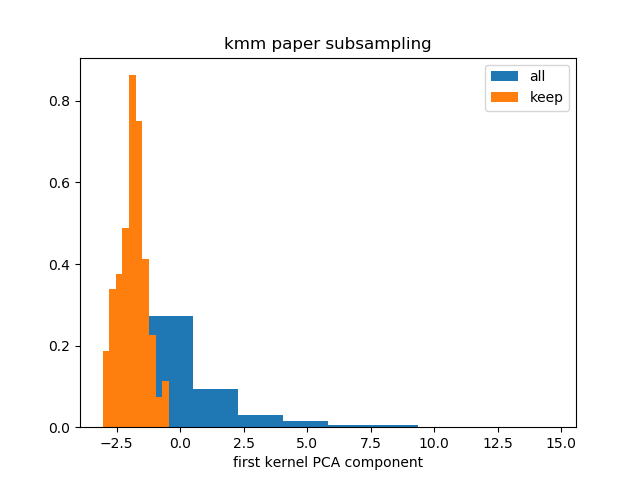

{'logverbosity': 2, 'maxiter': 2}
Optimizing...
 iter		   cost val	    grad. norm
    0	+1.6712881310087749e+02	2.00014993e+02
    1	+1.6713351656833342e+02	2.00210157e+02
Terminated - max iterations reached after 6.99 seconds.



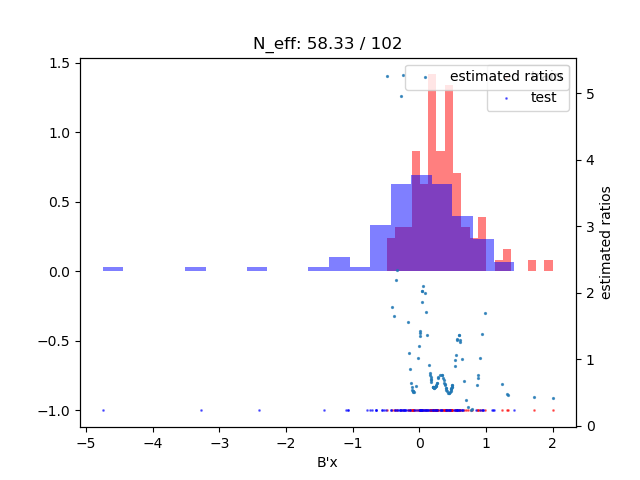

('fig_text #3',)
('train_loss: 1.45',)
('test_loss: 1.26',)


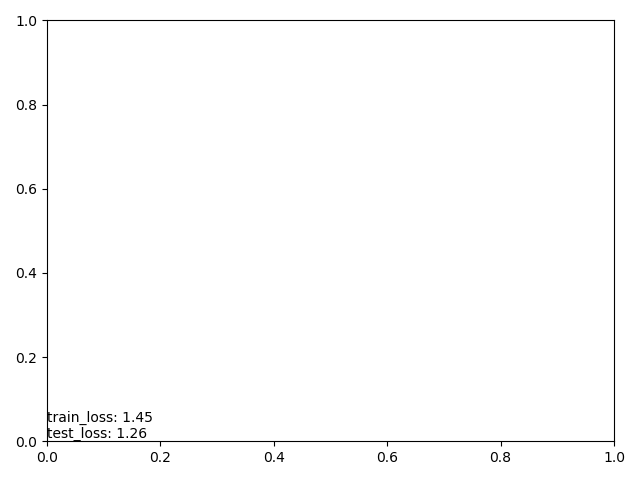

b_norm: 1.0


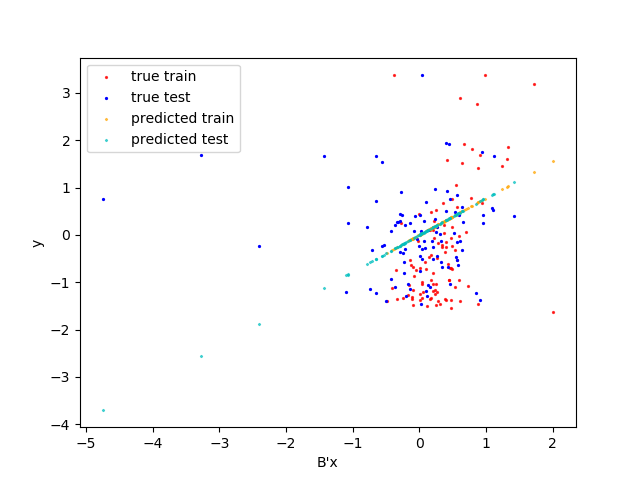

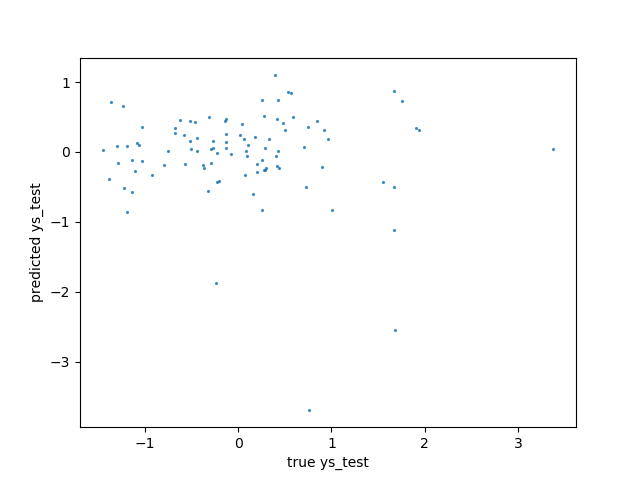

('fig_text #6',)
('single iteration',)
('inner iteration: 0',)
((('u_dim', 1), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 1.26',)
('train_loss: 1.45',)


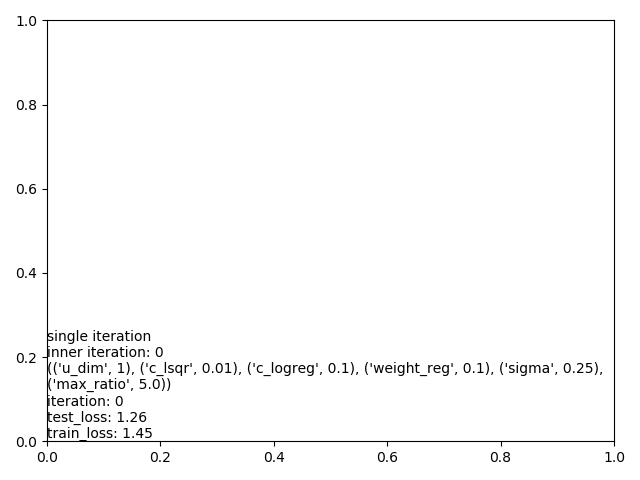

('fig_text #7',)
('single hyperparam',)
((('u_dim', 1), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('test mean loss: 1.26',)
('test std loss: 0.00',)
('test losses: [1.2603637232636404]',)
('train mean loss: 1.45',)
('train std loss: 0.00',)
('train losses: [1.453343140534358]',)


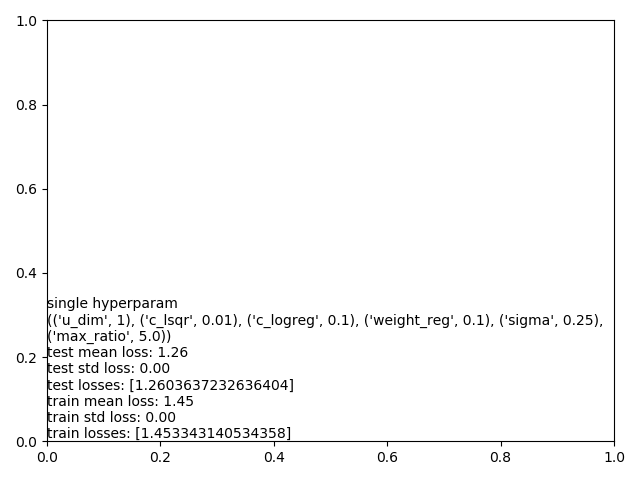

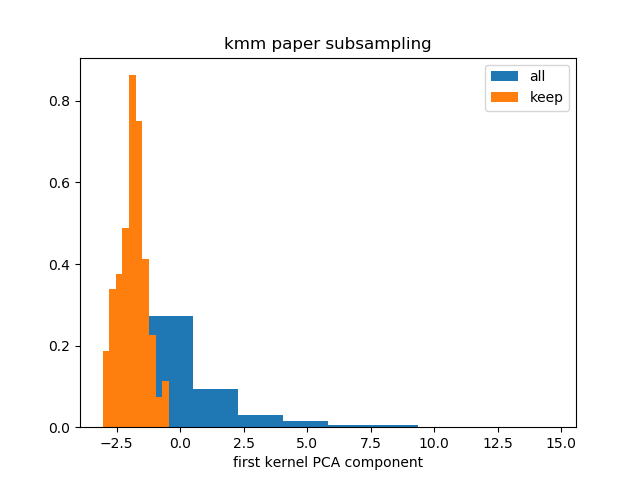

{'logverbosity': 2, 'maxiter': 2}
Optimizing...
 iter		   cost val	    grad. norm
    0	+1.6713994533420137e+02	1.99956208e+02
    1	+1.6714183724115358e+02	2.00052674e+02
Terminated - max iterations reached after 7.32 seconds.



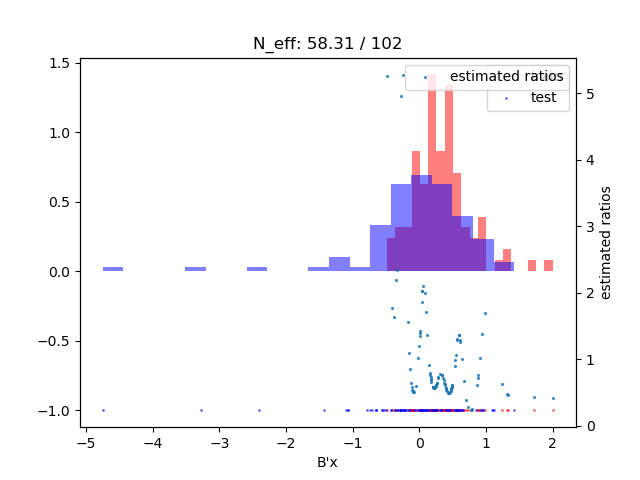

('fig_text #10',)
('train_loss: 1.45',)
('test_loss: 1.26',)


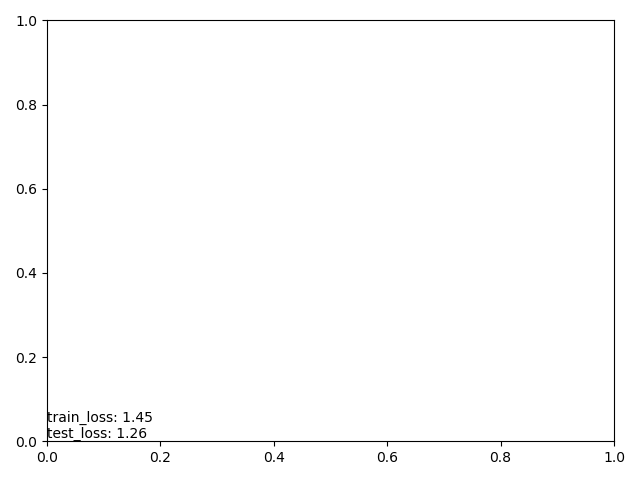

b_norm: 1.0


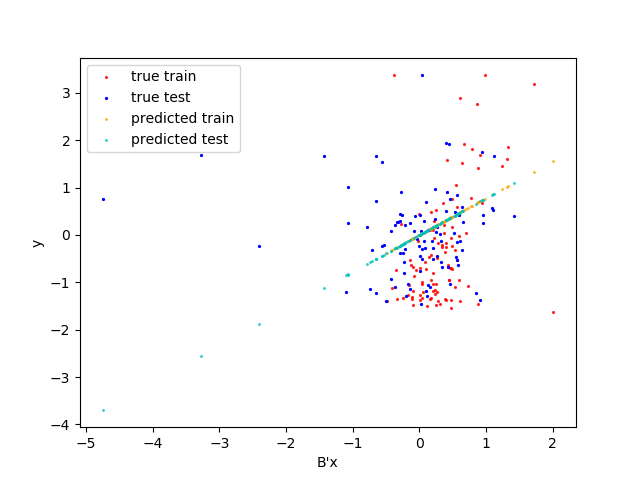

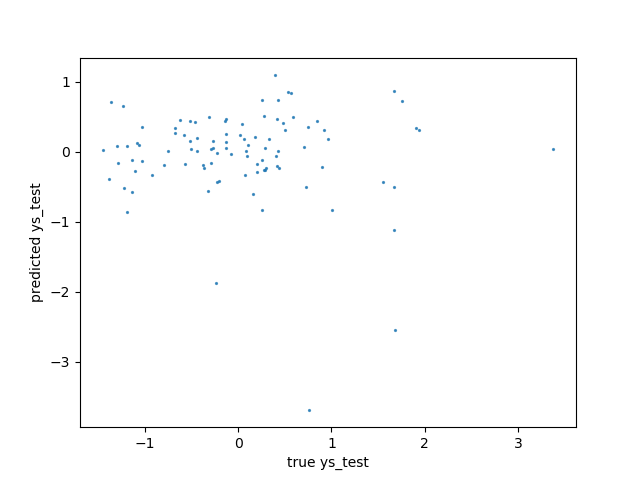

('fig_text #13',)
('single iteration',)
('inner iteration: 1',)
((('u_dim', 1), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 1.26',)
('train_loss: 1.45',)


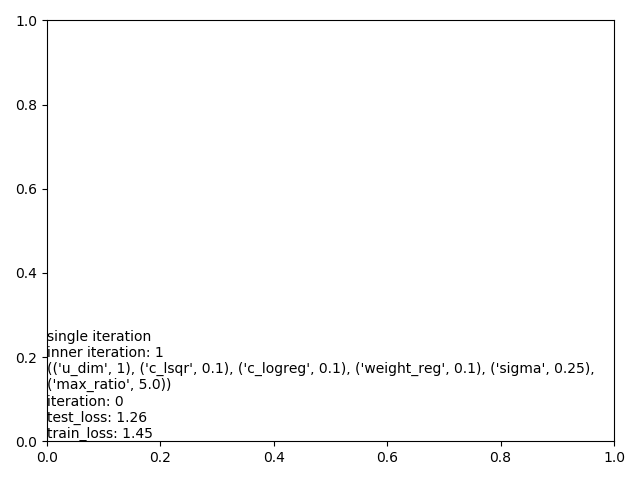

('fig_text #14',)
('single hyperparam',)
((('u_dim', 1), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('test mean loss: 1.26',)
('test std loss: 0.00',)
('test losses: [1.2597493412071905]',)
('train mean loss: 1.45',)
('train std loss: 0.00',)
('train losses: [1.4532535216456302]',)


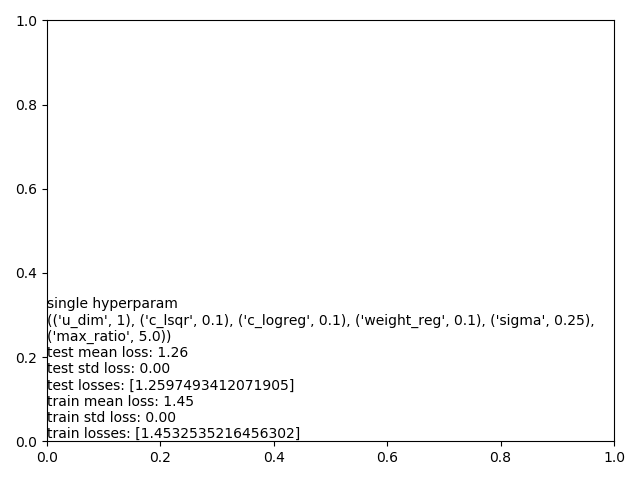

('fig_text #15',)
('single care_hyperparam_tuples',)
((('u_dim', 1),),)
('outer iteration: 0',)
("best: (('u_dim', 1), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)): test_mean_loss(std_loss): 1.26(0.00) train_mean_loss(std_loss): 1.45(0.00)",)
('all:',)
("(('u_dim', 1), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)): test_mean_loss(std): 1.26(0.00) train_mean_loss(std): 1.45(0.00)",)
("(('u_dim', 1), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)): test_mean_loss(std): 1.26(0.00) train_mean_loss(std): 1.45(0.00)",)


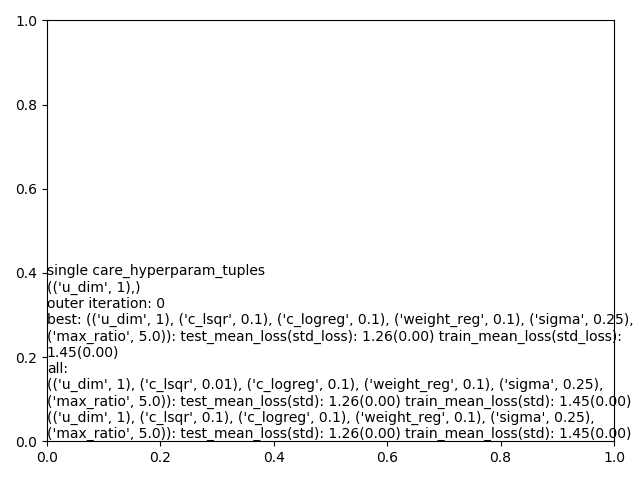

(u_dim, 1) 
 
 
 
 (c_lsqr, 0.01) 
 (c_lsqr, 0.1) 
 
 
 
 (c_logreg, 0.1) 
 (c_logreg, 0.1) 
 
 
 
 (weight_reg, 0.1) 
 (weight_reg, 0.1) 
 
 
 
 (sigma, 0.25) 
 (sigma, 0.25) 
 
 
 
 (max_ratio, 5.0) 
 (max_ratio, 5.0) 
 
 
 
 
 test_losses 
 [1.26036372326] 
 [1.25974934121] 
 
 
 test_mean_loss 
 1.26036 
 1.25975 
 
 
 test_std_loss 
 0 
 0 
 
 
 train_losses 
 [1.45334314053] 
 [1.45325352165] 
 
 
 train_mean_loss 
 1.45334 
 1.45325 
 
 
 train_std_loss 
 0 
 0

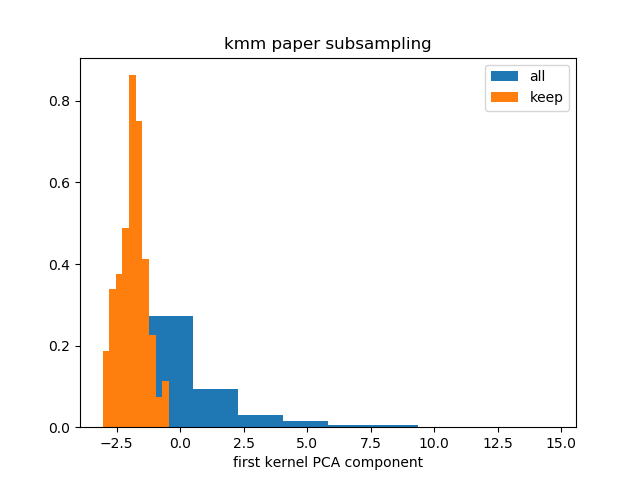

{'logverbosity': 2, 'maxiter': 2}
Optimizing...
 iter		   cost val	    grad. norm
    0	+8.3939922924407270e+01	3.82832801e+01
    1	+7.3785485951632495e+01	1.19128661e+02
Terminated - max iterations reached after 1.27 seconds.



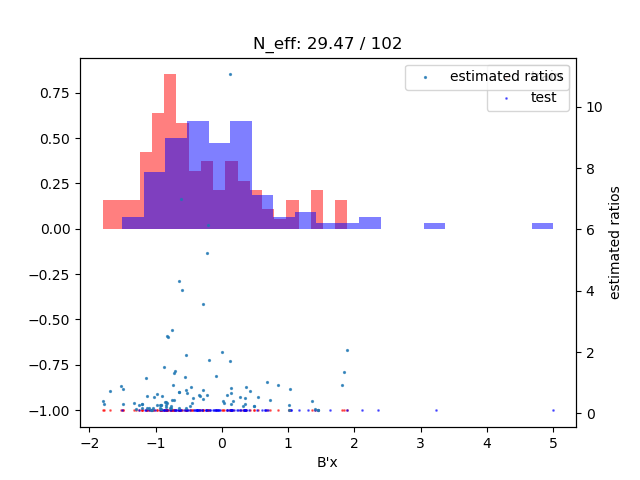

('fig_text #18',)
('train_loss: 0.59',)
('test_loss: 0.77',)


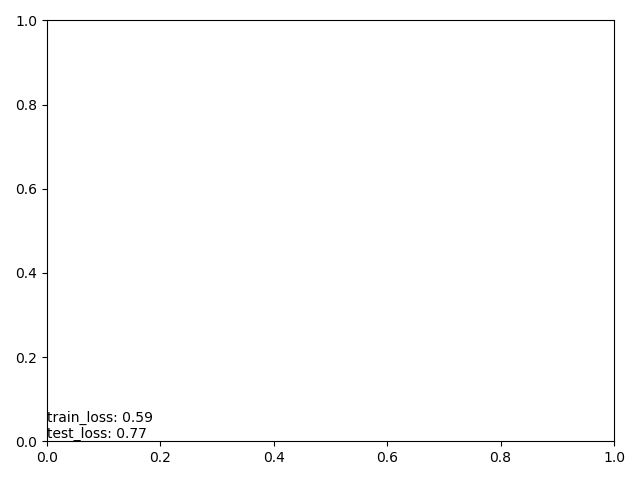

b_norm: 1.0


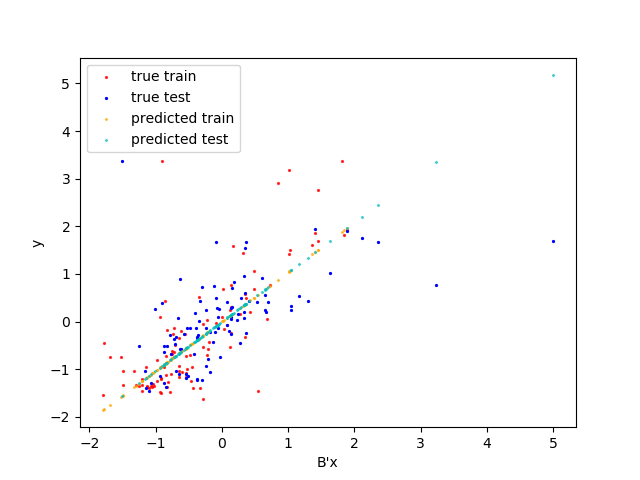

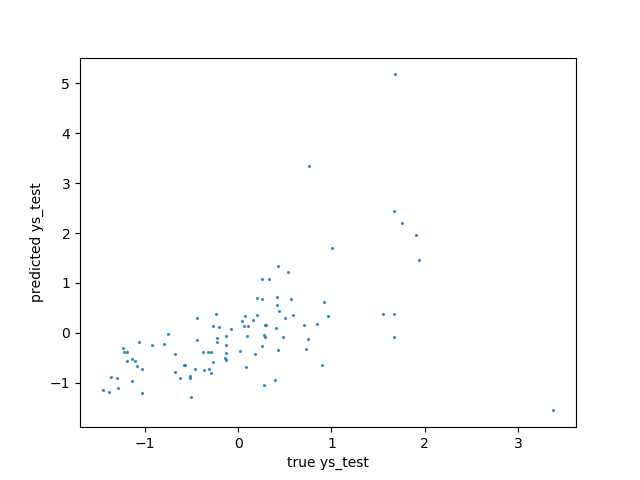

('fig_text #21',)
('single iteration',)
('inner iteration: 0',)
((('u_dim', 3), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 0.77',)
('train_loss: 0.59',)


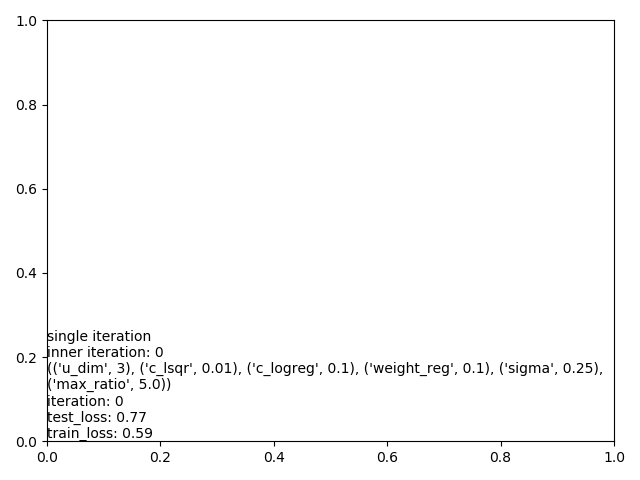

('fig_text #22',)
('single hyperparam',)
((('u_dim', 3), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('test mean loss: 0.77',)
('test std loss: 0.00',)
('test losses: [0.77206116120062607]',)
('train mean loss: 0.59',)
('train std loss: 0.00',)
('train losses: [0.59250510253080557]',)


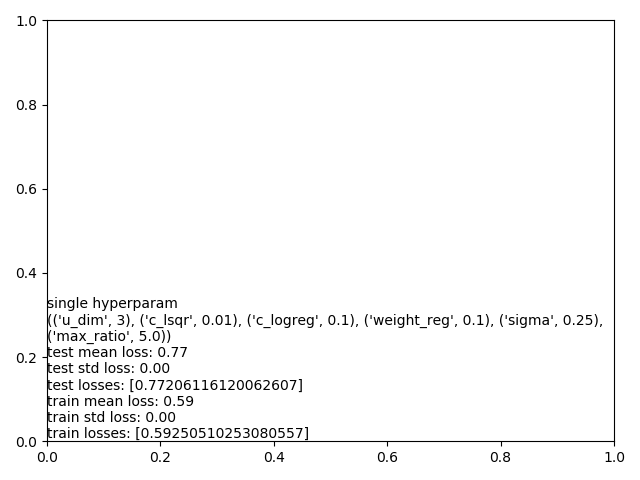

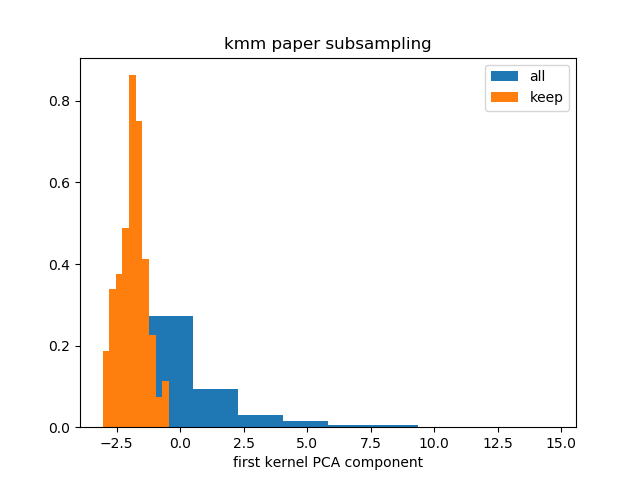

{'logverbosity': 2, 'maxiter': 2}
Optimizing...
 iter		   cost val	    grad. norm
    0	+8.3951527948687712e+01	3.83260596e+01
    1	+7.3888948825882125e+01	1.19127497e+02
Terminated - max iterations reached after 1.26 seconds.



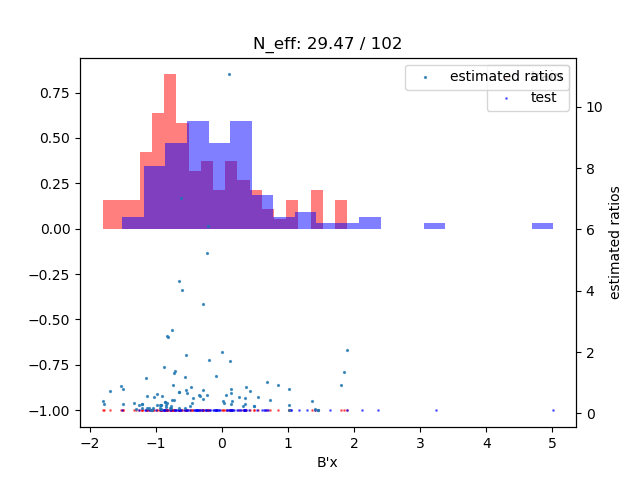

('fig_text #25',)
('train_loss: 0.59',)
('test_loss: 0.77',)


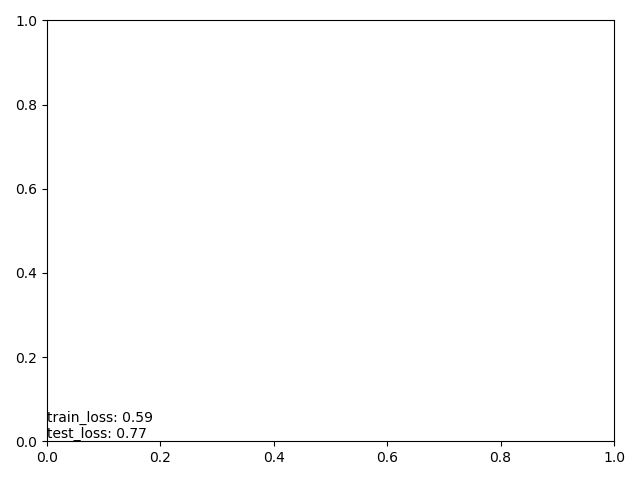

b_norm: 1.0


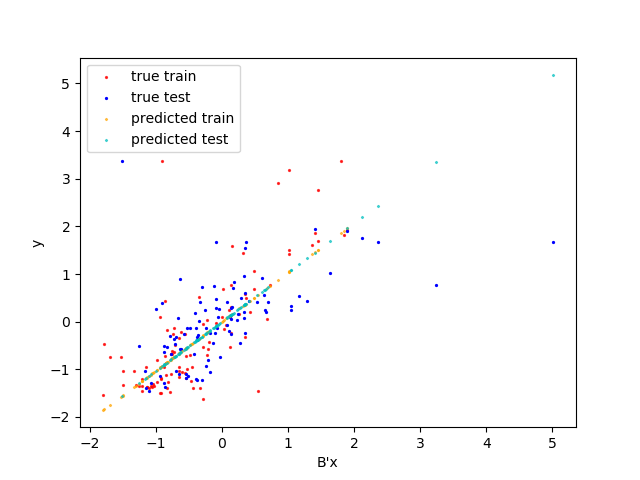

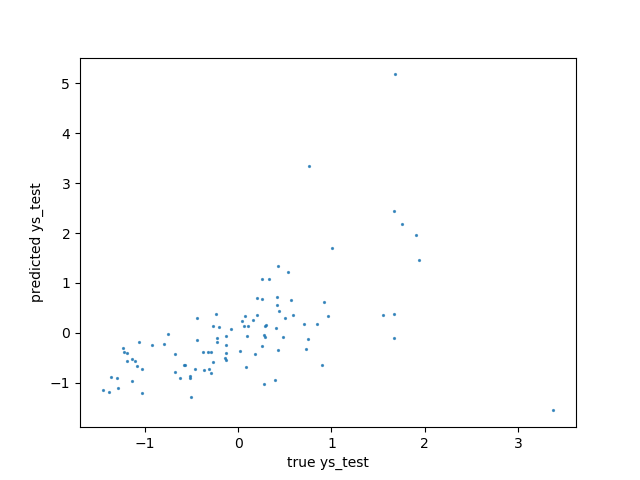

('fig_text #28',)
('single iteration',)
('inner iteration: 1',)
((('u_dim', 3), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('iteration: 0',)
('test_loss: 0.77',)
('train_loss: 0.59',)


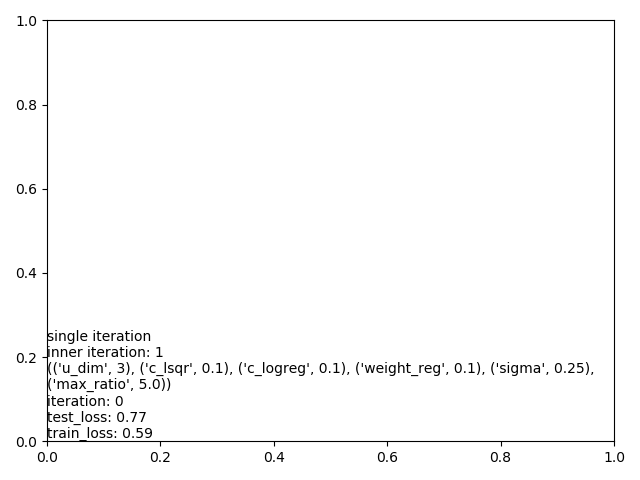

('fig_text #29',)
('single hyperparam',)
((('u_dim', 3), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)),)
('test mean loss: 0.77',)
('test std loss: 0.00',)
('test losses: [0.77110413074749562]',)
('train mean loss: 0.59',)
('train std loss: 0.00',)
('train losses: [0.59252657102482276]',)


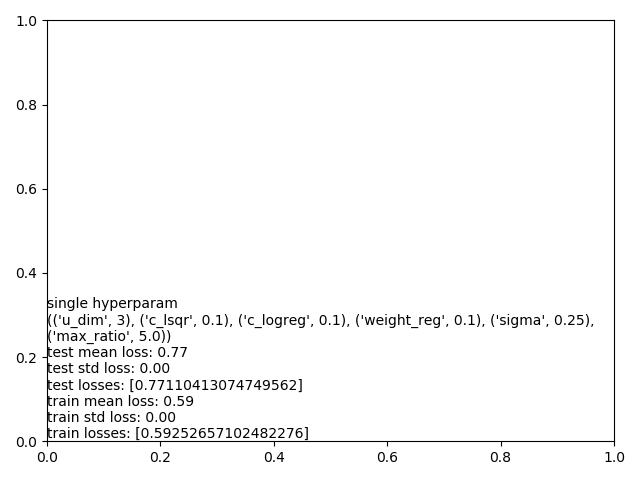

('fig_text #30',)
('single care_hyperparam_tuples',)
((('u_dim', 3),),)
('outer iteration: 1',)
("best: (('u_dim', 3), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)): test_mean_loss(std_loss): 0.77(0.00) train_mean_loss(std_loss): 0.59(0.00)",)
('all:',)
("(('u_dim', 3), ('c_lsqr', 0.01), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)): test_mean_loss(std): 0.77(0.00) train_mean_loss(std): 0.59(0.00)",)
("(('u_dim', 3), ('c_lsqr', 0.1), ('c_logreg', 0.1), ('weight_reg', 0.1), ('sigma', 0.25), ('max_ratio', 5.0)): test_mean_loss(std): 0.77(0.00) train_mean_loss(std): 0.59(0.00)",)


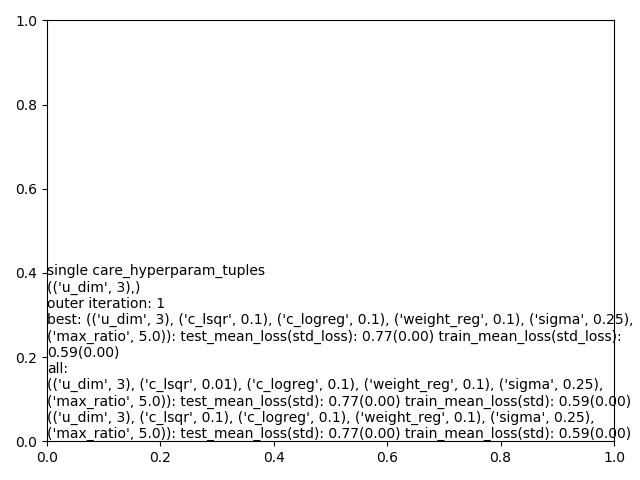

(u_dim, 3) 
 
 
 
 (c_lsqr, 0.01) 
 (c_lsqr, 0.1) 
 
 
 
 (c_logreg, 0.1) 
 (c_logreg, 0.1) 
 
 
 
 (weight_reg, 0.1) 
 (weight_reg, 0.1) 
 
 
 
 (sigma, 0.25) 
 (sigma, 0.25) 
 
 
 
 (max_ratio, 5.0) 
 (max_ratio, 5.0) 
 
 
 
 
 test_losses 
 [0.772061161201] 
 [0.771104130747] 
 
 
 test_mean_loss 
 0.772061 
 0.771104 
 
 
 test_std_loss 
 0 
 0 
 
 
 train_losses 
 [0.592505102531] 
 [0.592526571025] 
 
 
 train_mean_loss 
 0.592505 
 0.592527 
 
 
 train_std_loss 
 0 
 0

In [11]:
# 
run.run(get_data, get_fitter, care_hyperparam_tuples, nocare_hyperparam_tuples, num_iterations, mapper)